In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math
import glob
import torchvision.transforms as transforms
#import cv2 as cv

os.chdir('/Users/ethanpickering/Downloads/Archive/')

In [2]:
class ChickenDataset(Dataset):

    def __init__(self, x, y):
        self.n_samples = y.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = x # size [n_samples, n_features (pixels x pixels)]
        self.y_data = y # size [n_samples, n_features (pixels x pixels)]        
        
    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

In [ ]:
path = glob.glob("*.jpg")

#t_img = torch.empty((10, 1, 1080, 1920))
t_img = torch.empty((999, 1, 216, 384))

#t_img = torch.empty((10, 1, 27, 32))
#t_img = torch.empty((10, 1, 60, 60))
y_img = torch.empty((999, 1))
j = 0
for img in path:
    n = cv2.imread(img)
    n = cv2.cvtColor(n, cv2.COLOR_BGR2RGB)
    r1 = n[:,:,0] # get 1 channel
    r1 = cv2.resize(r1, None, fx=1/ds_x, fy=1/ds_y)
    t1 = transform(r1)
    t_img[j,:,:,:] = t1
    y_img[j,:] = 1
    j = j+1
    #n x 1 x px x py
    
plt.imshow(t_img[2,0,:,:])
print(t_img.shape)
print(t_img.shape)

#t_img_test = torch.empty((50, 1, 216, 384))
#y_img_test = torch.empty((50, 1))

t_img_test = t_img[949:998,:,:,:]
y_img_test = y_img[949:998,:]

plt.imshow(t_img_test[2,0,:,:])

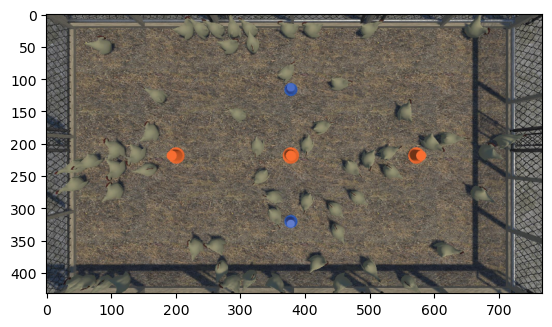

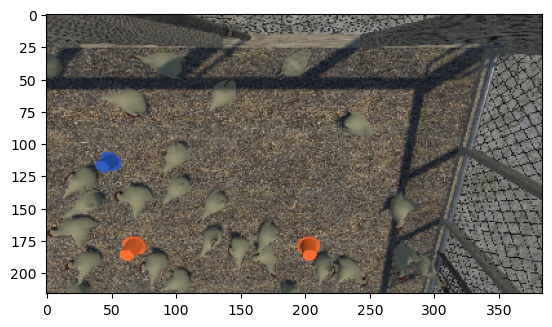

torch.Size([3, 216, 384])
torch.Size([3, 432, 768])


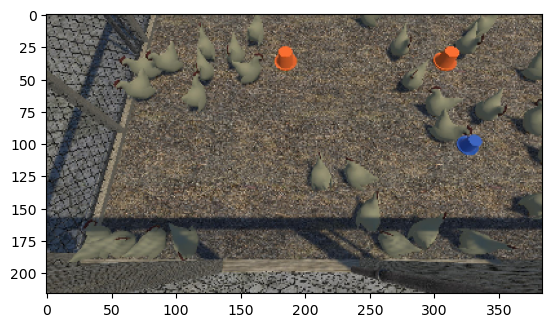

In [18]:
ds_x = 5
ds_y = 5
transform = transforms.Compose([
    transforms.ToTensor()
])

def import_image2tensor(path, ds_x, ds_y):
    
    n = cv2.imread(path)
    n = cv2.cvtColor(n, cv2.COLOR_BGR2RGB)
    r1 = n[:,:,0] # get 1 channel
    g1 = n[:,:,1] # get 1 channel
    b1 = n[:,:,2] # get 1 channel
    r1 = cv2.resize(r1, None, fx=1/ds_x, fy=1/ds_y)
    g1 = cv2.resize(g1, None, fx=1/ds_x, fy=1/ds_y)
    b1 = cv2.resize(b1, None, fx=1/ds_x, fy=1/ds_y)
    r1 = transform(r1)
    g1 = transform(g1)
    b1 = transform(b1)
    img = torch.empty((3, b1.shape[1], b1.shape[2]))
    img[0,:,:] = r1
    img[1,:,:] = g1
    img[2,:,:] = b1
    
    return img



cam1 = torch.empty((3, 216, 384))
cam2 = torch.empty((3, 216, 384))
cam3 = torch.empty((3, 216, 384))
cam4 = torch.empty((3, 216, 384))


n = cv2.imread('./cam1/cam1_2000.jpg')
n = cv2.cvtColor(n, cv2.COLOR_BGR2RGB)
r1 = n[:,:,0] # get 1 channel
g1 = n[:,:,1] # get 1 channel
b1 = n[:,:,2] # get 1 channel
r1 = cv2.resize(r1, None, fx=1/ds_x, fy=1/ds_y)
g1 = cv2.resize(g1, None, fx=1/ds_x, fy=1/ds_y)
b1 = cv2.resize(b1, None, fx=1/ds_x, fy=1/ds_y)
r1 = transform(r1)
g1 = transform(g1)
b1 = transform(b1)
cam1[0,:,:] = r1
cam1[1,:,:] = g1
cam1[2,:,:] = b1

cam1 = import_image2tensor('./cam1/cam1_2000.jpg', ds_x, ds_y)
cam2 = import_image2tensor('./cam2/cam2_2000.jpg', ds_x, ds_y)
cam3 = import_image2tensor('./cam3/cam3_2000.jpg', ds_x, ds_y)
cam4 = import_image2tensor('./cam4/cam4_2000.jpg', ds_x, ds_y)
ds_x = 2.5
ds_y = 2.5
main_cam = import_image2tensor('./mainCam/mainCam_2000.jpg', ds_x, ds_y)


plt.imshow(main_cam.permute(1,2,0))
plt.show()
main_cam.shape

plt.imshow(cam4.permute(1,2,0))
plt.show()

print(cam4.shape)
print(main_cam.shape)

plt.imshow(cam1.permute(1,2,0))
plt.show()



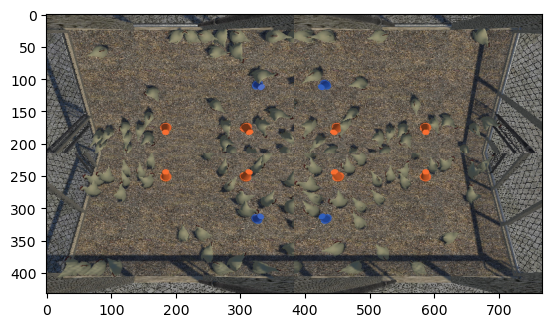

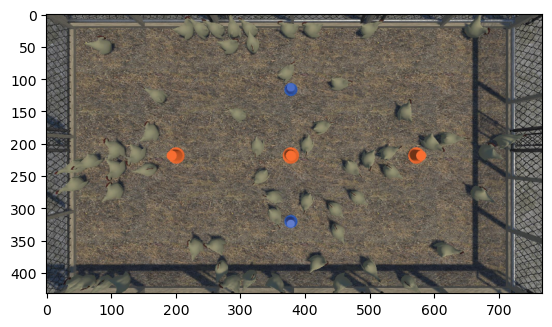

In [19]:
cam1.shape
dim_1 = 216
dim_2 = 384
cams = torch.empty((1, 3, 2*dim_1, 2*dim_2))
cams[0,:,dim_1:dim_1*2,0:dim_2] = cam1
cams[0,:,0:dim_1,0:dim_2] = cam2
cams[0,:,0:dim_1,dim_2:dim_2*2] = torch.flip(cam3, [1])
cams[0,:,dim_1:dim_1*2,dim_2:dim_2*2] = torch.flip(cam4, [1])
to_plot = cams[0,:,:,:]
plt.imshow(to_plot.permute(1,2,0))
plt.show()

top = torch.empty((1, 3, dim_1*2, dim_2*2)) #432 x 768
top[0,:,:,:] = main_cam
to_plotc = top[0,:,:,:]
plt.imshow(to_plotc.permute(1,2,0))
plt.show()


In [21]:
dataset = ChickenDataset(cams, top)
# Ok, now we have the dataset set up. Lets see if we can recreate the training
data_loader = torch.utils.data.DataLoader(dataset=dataset,
                                          batch_size=1,
                                          shuffle=True)

tensor([[[0.2000, 0.2353, 0.2392,  ..., 0.2863, 0.2706, 0.2745],
         [0.3529, 0.3569, 0.3765,  ..., 0.1294, 0.0471, 0.2039],
         [0.3725, 0.3255, 0.3176,  ..., 0.2784, 0.2471, 0.3020],
         ...,
         [0.2706, 0.2627, 0.3020,  ..., 0.0941, 0.0706, 0.0706],
         [0.4039, 0.3255, 0.3137,  ..., 0.2902, 0.2863, 0.2471],
         [0.3333, 0.4314, 0.3882,  ..., 0.2078, 0.2118, 0.1961]],

        [[0.1843, 0.2196, 0.2235,  ..., 0.2863, 0.2706, 0.2745],
         [0.3373, 0.3412, 0.3608,  ..., 0.1294, 0.0471, 0.2039],
         [0.3569, 0.3098, 0.3020,  ..., 0.2863, 0.2549, 0.3098],
         ...,
         [0.2706, 0.2627, 0.3020,  ..., 0.0941, 0.0706, 0.0706],
         [0.3922, 0.3137, 0.2980,  ..., 0.2902, 0.2863, 0.2471],
         [0.3216, 0.4196, 0.3725,  ..., 0.2078, 0.2118, 0.1961]],

        [[0.1412, 0.1765, 0.1804,  ..., 0.2863, 0.2706, 0.2745],
         [0.2941, 0.2980, 0.3176,  ..., 0.1294, 0.0471, 0.2039],
         [0.3137, 0.2667, 0.2588,  ..., 0.2824, 0.2510, 0.

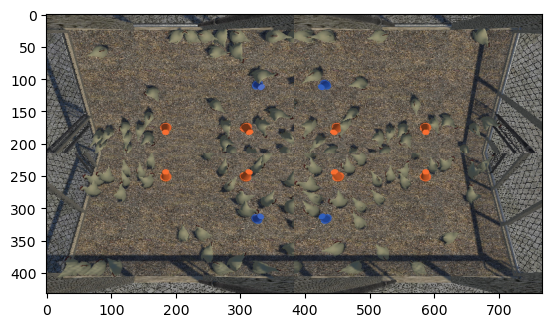

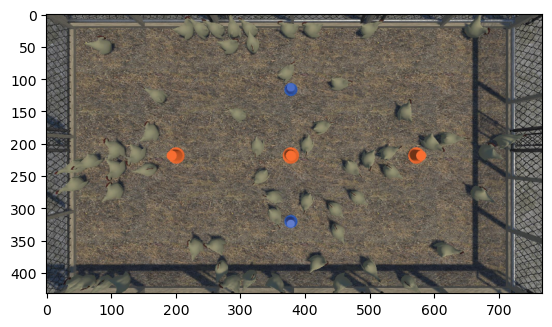

In [22]:
# get first sample and unpack
first_data = dataset[0]
features, labels = first_data
print(features, labels)
plt.imshow(features.permute(1,2,0))
plt.show()
plt.imshow(labels.permute(1,2,0))
plt.show()

In [23]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()        
        # N, 1, 28, 28
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 11, stride=9, padding=1), # -> N, 16, 30, 30 (60, 60)
            nn.ReLU(),
            nn.Conv2d(16, 32, 11, stride=9, padding=1), # -> N, 32, 15, 15 (14, 16)
            nn.ReLU(),
            nn.Conv2d(32, 64, 4) # -> N, 64, 1, 1
        )
        
        self.FCN = nn.Sequential(
            nn.Linear(768, 200), # (N, 784) -> (N, 128)
            nn.ReLU(),
            nn.Linear(200, 100),
            nn.ReLU(),
            nn.Linear(100, 200),
            nn.ReLU(),
            nn.Linear(200, 768) # -> N, 3
        )
        
        # N , 64, 1, 1
        #Output_size=(Input_size−1)×stride−2×padding+kernel_size+output_padding
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 4, stride=(1,4)), # 
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, (11,8), stride=(9,8), padding=(0,0), output_padding=(1,0)), # N, 16, 14, 14 (N,16,13,13 without output_padding)
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, (11,5), stride=(9,4), padding=(1,1), output_padding=(0,1)), # N, 1, 28, 28  (N,1,27,27)
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        #print(encoded.shape)
#        flattened = torch.flatten(encoded)
        #print(flattened.shape)
#        fcn_x = self.FCN(flattened)
        #unflattener = torch.unflatten(0, (64, 2, 6))
        #unflatten = torch.nn.Unflatten(0, (14,14))
#        unflattened = torch.unflatten(fcn_x, 0, (1, 64, 2, 6))
        #print(unflattened.shape)
        decoded = self.decoder(encoded)
        #print(decoded.shape)
        return decoded
    
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=1e-3, 
                             weight_decay=1e-5)

In [ ]:
        # N , 64, 1, 1
        #Output_size=(Input_size−1)×stride−2×padding+kernel_size+output_padding
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 4, stride=(1,1)), # 
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, (11,5), stride=(3,3), padding=(1,1), output_padding=(0,1)), # N, 16, 14, 14 (N,16,13,13 without output_padding)
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, (11,5), stride=(3,3), padding=(1,0), output_padding=(0,1)), # N, 1, 28, 28  (N,1,27,27)
            nn.Sigmoid()
        )

In [156]:
input_size = 42
stride = 1
padding=0
kernel_size=4
output_padding=0
layer_1 = (input_size-1)*stride-2*padding+kernel_size+output_padding
print(layer_1)
stride = 3
padding=1
kernel_size=11
output_padding=0
layer_2 = (layer_1-1)*stride-2*padding+kernel_size+output_padding
print(layer_2)
stride = 3
padding=1
kernel_size=11
output_padding=0
layer_3 = (layer_2-1)*stride-2*padding+kernel_size+output_padding
print(layer_3)
432

45
141
429


432

In [162]:
#Output_size=(Input_size−1)×stride−2×padding+kernel_size+output_padding
# Need 432, 768
input_size = 79
stride = 1
padding=0
kernel_size=4
output_padding=0
layer_1 = (input_size-1)*stride-2*padding+kernel_size+output_padding
print(layer_1)
stride = 3
padding=1
kernel_size=11
output_padding=1
layer_2 = (layer_1-1)*stride-2*padding+kernel_size+output_padding
print(layer_2)
stride = 3
padding=0
kernel_size=11
output_padding=1
layer_3 = (layer_2-1)*stride-2*padding+kernel_size+output_padding
print(layer_3)

82
253
768


In [ ]:
import time
# Point to training loop video
num_epochs = 5000
outputs = []

for epoch in range(num_epochs):
    start = time.perf_counter()
    for (img, target) in data_loader:
        #img = img.reshape(-1, 28*28) # -> use for Autoencoder_Linear
        recon = model(img)
        loss = criterion(recon, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    end = time.perf_counter()
    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}, Time:{end-start:.4f}')
    outputs.append((epoch, img, recon))

# 432, 768

Epoch:1, Loss:0.0036, Time:0.0442
Epoch:2, Loss:0.0036, Time:0.0199
Epoch:3, Loss:0.0036, Time:0.0182
Epoch:4, Loss:0.0036, Time:0.0155
Epoch:5, Loss:0.0036, Time:0.0160
Epoch:6, Loss:0.0036, Time:0.0148
Epoch:7, Loss:0.0036, Time:0.0146
Epoch:8, Loss:0.0036, Time:0.0149
Epoch:9, Loss:0.0035, Time:0.0146
Epoch:10, Loss:0.0036, Time:0.0143
Epoch:11, Loss:0.0036, Time:0.0156
Epoch:12, Loss:0.0036, Time:0.0138
Epoch:13, Loss:0.0035, Time:0.0152
Epoch:14, Loss:0.0035, Time:0.0156
Epoch:15, Loss:0.0035, Time:0.0207
Epoch:16, Loss:0.0036, Time:0.0175
Epoch:17, Loss:0.0036, Time:0.0177
Epoch:18, Loss:0.0036, Time:0.0158
Epoch:19, Loss:0.0036, Time:0.0168
Epoch:20, Loss:0.0036, Time:0.0159
Epoch:21, Loss:0.0036, Time:0.0151
Epoch:22, Loss:0.0036, Time:0.0154
Epoch:23, Loss:0.0036, Time:0.0146
Epoch:24, Loss:0.0035, Time:0.0149
Epoch:25, Loss:0.0035, Time:0.0156
Epoch:26, Loss:0.0036, Time:0.0145
Epoch:27, Loss:0.0036, Time:0.0130
Epoch:28, Loss:0.0036, Time:0.0144
Epoch:29, Loss:0.0035, Time:0

Epoch:235, Loss:0.0034, Time:0.0101
Epoch:236, Loss:0.0034, Time:0.0118
Epoch:237, Loss:0.0034, Time:0.0114
Epoch:238, Loss:0.0034, Time:0.0113
Epoch:239, Loss:0.0035, Time:0.0103
Epoch:240, Loss:0.0035, Time:0.0112
Epoch:241, Loss:0.0035, Time:0.0106
Epoch:242, Loss:0.0034, Time:0.0110
Epoch:243, Loss:0.0034, Time:0.0124
Epoch:244, Loss:0.0034, Time:0.0124
Epoch:245, Loss:0.0034, Time:0.0124
Epoch:246, Loss:0.0034, Time:0.0108
Epoch:247, Loss:0.0034, Time:0.0121
Epoch:248, Loss:0.0034, Time:0.0110
Epoch:249, Loss:0.0034, Time:0.0119
Epoch:250, Loss:0.0034, Time:0.0123
Epoch:251, Loss:0.0034, Time:0.0113
Epoch:252, Loss:0.0034, Time:0.0107
Epoch:253, Loss:0.0034, Time:0.0123
Epoch:254, Loss:0.0034, Time:0.0122
Epoch:255, Loss:0.0034, Time:0.0115
Epoch:256, Loss:0.0034, Time:0.0107
Epoch:257, Loss:0.0034, Time:0.0113
Epoch:258, Loss:0.0034, Time:0.0111
Epoch:259, Loss:0.0034, Time:0.0112
Epoch:260, Loss:0.0034, Time:0.0113
Epoch:261, Loss:0.0034, Time:0.0106
Epoch:262, Loss:0.0034, Time

Epoch:473, Loss:0.0034, Time:0.0118
Epoch:474, Loss:0.0034, Time:0.0129
Epoch:475, Loss:0.0034, Time:0.0130
Epoch:476, Loss:0.0034, Time:0.0125
Epoch:477, Loss:0.0034, Time:0.0109
Epoch:478, Loss:0.0034, Time:0.0111
Epoch:479, Loss:0.0034, Time:0.0119
Epoch:480, Loss:0.0034, Time:0.0112
Epoch:481, Loss:0.0034, Time:0.0111
Epoch:482, Loss:0.0034, Time:0.0116
Epoch:483, Loss:0.0034, Time:0.0110
Epoch:484, Loss:0.0034, Time:0.0107
Epoch:485, Loss:0.0034, Time:0.0116
Epoch:486, Loss:0.0034, Time:0.0111
Epoch:487, Loss:0.0034, Time:0.0124
Epoch:488, Loss:0.0034, Time:0.0124
Epoch:489, Loss:0.0034, Time:0.0125
Epoch:490, Loss:0.0034, Time:0.0113
Epoch:491, Loss:0.0034, Time:0.0118
Epoch:492, Loss:0.0034, Time:0.0114
Epoch:493, Loss:0.0034, Time:0.0109
Epoch:494, Loss:0.0034, Time:0.0109
Epoch:495, Loss:0.0034, Time:0.0106
Epoch:496, Loss:0.0034, Time:0.0102
Epoch:497, Loss:0.0034, Time:0.0115
Epoch:498, Loss:0.0034, Time:0.0102
Epoch:499, Loss:0.0034, Time:0.0108
Epoch:500, Loss:0.0034, Time

Epoch:719, Loss:0.0033, Time:0.0108
Epoch:720, Loss:0.0033, Time:0.0118
Epoch:721, Loss:0.0033, Time:0.0111
Epoch:722, Loss:0.0033, Time:0.0106
Epoch:723, Loss:0.0033, Time:0.0113
Epoch:724, Loss:0.0034, Time:0.0110
Epoch:725, Loss:0.0034, Time:0.0110
Epoch:726, Loss:0.0033, Time:0.0110
Epoch:727, Loss:0.0033, Time:0.0104
Epoch:728, Loss:0.0033, Time:0.0114
Epoch:729, Loss:0.0033, Time:0.0109
Epoch:730, Loss:0.0033, Time:0.0112
Epoch:731, Loss:0.0033, Time:0.0119
Epoch:732, Loss:0.0033, Time:0.0105
Epoch:733, Loss:0.0033, Time:0.0112
Epoch:734, Loss:0.0033, Time:0.0102
Epoch:735, Loss:0.0033, Time:0.0104
Epoch:736, Loss:0.0033, Time:0.0108
Epoch:737, Loss:0.0033, Time:0.0114
Epoch:738, Loss:0.0033, Time:0.0119
Epoch:739, Loss:0.0033, Time:0.0115
Epoch:740, Loss:0.0033, Time:0.0133
Epoch:741, Loss:0.0033, Time:0.0132
Epoch:742, Loss:0.0033, Time:0.0145
Epoch:743, Loss:0.0033, Time:0.0138
Epoch:744, Loss:0.0033, Time:0.0132
Epoch:745, Loss:0.0033, Time:0.0140
Epoch:746, Loss:0.0033, Time

Epoch:964, Loss:0.0033, Time:0.0112
Epoch:965, Loss:0.0033, Time:0.0114
Epoch:966, Loss:0.0033, Time:0.0103
Epoch:967, Loss:0.0033, Time:0.0104
Epoch:968, Loss:0.0033, Time:0.0117
Epoch:969, Loss:0.0033, Time:0.0130
Epoch:970, Loss:0.0033, Time:0.0117
Epoch:971, Loss:0.0033, Time:0.0121
Epoch:972, Loss:0.0034, Time:0.0101
Epoch:973, Loss:0.0033, Time:0.0108
Epoch:974, Loss:0.0033, Time:0.0110
Epoch:975, Loss:0.0033, Time:0.0108
Epoch:976, Loss:0.0033, Time:0.0109
Epoch:977, Loss:0.0033, Time:0.0109
Epoch:978, Loss:0.0033, Time:0.0104
Epoch:979, Loss:0.0033, Time:0.0111
Epoch:980, Loss:0.0033, Time:0.0114
Epoch:981, Loss:0.0033, Time:0.0125
Epoch:982, Loss:0.0033, Time:0.0127
Epoch:983, Loss:0.0033, Time:0.0159
Epoch:984, Loss:0.0033, Time:0.0118
Epoch:985, Loss:0.0033, Time:0.0104
Epoch:986, Loss:0.0033, Time:0.0109
Epoch:987, Loss:0.0033, Time:0.0121
Epoch:988, Loss:0.0033, Time:0.0106
Epoch:989, Loss:0.0033, Time:0.0103
Epoch:990, Loss:0.0033, Time:0.0107
Epoch:991, Loss:0.0033, Time

Epoch:1187, Loss:0.0033, Time:0.0114
Epoch:1188, Loss:0.0033, Time:0.0126
Epoch:1189, Loss:0.0033, Time:0.0175
Epoch:1190, Loss:0.0033, Time:0.0185
Epoch:1191, Loss:0.0033, Time:0.0111
Epoch:1192, Loss:0.0033, Time:0.0123
Epoch:1193, Loss:0.0033, Time:0.0109
Epoch:1194, Loss:0.0033, Time:0.0109
Epoch:1195, Loss:0.0033, Time:0.0116
Epoch:1196, Loss:0.0033, Time:0.0114
Epoch:1197, Loss:0.0033, Time:0.0113
Epoch:1198, Loss:0.0033, Time:0.0106
Epoch:1199, Loss:0.0033, Time:0.0184
Epoch:1200, Loss:0.0033, Time:0.0185
Epoch:1201, Loss:0.0033, Time:0.0108
Epoch:1202, Loss:0.0033, Time:0.0113
Epoch:1203, Loss:0.0033, Time:0.0125
Epoch:1204, Loss:0.0033, Time:0.0135
Epoch:1205, Loss:0.0033, Time:0.0136
Epoch:1206, Loss:0.0033, Time:0.0367
Epoch:1207, Loss:0.0033, Time:0.0180
Epoch:1208, Loss:0.0033, Time:0.0113
Epoch:1209, Loss:0.0033, Time:0.0132
Epoch:1210, Loss:0.0033, Time:0.0201
Epoch:1211, Loss:0.0033, Time:0.0144
Epoch:1212, Loss:0.0033, Time:0.0129
Epoch:1213, Loss:0.0033, Time:0.0150
E

Epoch:1414, Loss:0.0032, Time:0.0136
Epoch:1415, Loss:0.0032, Time:0.0120
Epoch:1416, Loss:0.0032, Time:0.0125
Epoch:1417, Loss:0.0032, Time:0.0105
Epoch:1418, Loss:0.0032, Time:0.0120
Epoch:1419, Loss:0.0033, Time:0.0103
Epoch:1420, Loss:0.0033, Time:0.0127
Epoch:1421, Loss:0.0033, Time:0.0120
Epoch:1422, Loss:0.0033, Time:0.0130
Epoch:1423, Loss:0.0034, Time:0.0123
Epoch:1424, Loss:0.0033, Time:0.0204
Epoch:1425, Loss:0.0033, Time:0.0150
Epoch:1426, Loss:0.0033, Time:0.0107
Epoch:1427, Loss:0.0033, Time:0.0132
Epoch:1428, Loss:0.0033, Time:0.0127
Epoch:1429, Loss:0.0033, Time:0.0122
Epoch:1430, Loss:0.0033, Time:0.0171
Epoch:1431, Loss:0.0033, Time:0.0184
Epoch:1432, Loss:0.0033, Time:0.0124
Epoch:1433, Loss:0.0033, Time:0.0107
Epoch:1434, Loss:0.0033, Time:0.0114
Epoch:1435, Loss:0.0032, Time:0.0143
Epoch:1436, Loss:0.0033, Time:0.0123
Epoch:1437, Loss:0.0033, Time:0.0113
Epoch:1438, Loss:0.0032, Time:0.0187
Epoch:1439, Loss:0.0032, Time:0.0221
Epoch:1440, Loss:0.0032, Time:0.0124
E

Epoch:1648, Loss:0.0032, Time:0.0105
Epoch:1649, Loss:0.0032, Time:0.0122
Epoch:1650, Loss:0.0032, Time:0.0111
Epoch:1651, Loss:0.0032, Time:0.0108
Epoch:1652, Loss:0.0032, Time:0.0107
Epoch:1653, Loss:0.0032, Time:0.0119
Epoch:1654, Loss:0.0032, Time:0.0150
Epoch:1655, Loss:0.0032, Time:0.0220
Epoch:1656, Loss:0.0032, Time:0.0170
Epoch:1657, Loss:0.0032, Time:0.0127
Epoch:1658, Loss:0.0032, Time:0.0117
Epoch:1659, Loss:0.0032, Time:0.0121
Epoch:1660, Loss:0.0032, Time:0.0118
Epoch:1661, Loss:0.0032, Time:0.0113
Epoch:1662, Loss:0.0032, Time:0.0113
Epoch:1663, Loss:0.0032, Time:0.0105
Epoch:1664, Loss:0.0032, Time:0.0113
Epoch:1665, Loss:0.0032, Time:0.0112
Epoch:1666, Loss:0.0032, Time:0.0109
Epoch:1667, Loss:0.0032, Time:0.0134
Epoch:1668, Loss:0.0032, Time:0.0180
Epoch:1669, Loss:0.0032, Time:0.0197
Epoch:1670, Loss:0.0032, Time:0.0111
Epoch:1671, Loss:0.0032, Time:0.0106
Epoch:1672, Loss:0.0032, Time:0.0112
Epoch:1673, Loss:0.0032, Time:0.0111
Epoch:1674, Loss:0.0032, Time:0.0102
E

Epoch:1879, Loss:0.0032, Time:0.0115
Epoch:1880, Loss:0.0032, Time:0.0117
Epoch:1881, Loss:0.0032, Time:0.0110
Epoch:1882, Loss:0.0032, Time:0.0110
Epoch:1883, Loss:0.0032, Time:0.0130
Epoch:1884, Loss:0.0032, Time:0.0158
Epoch:1885, Loss:0.0032, Time:0.0129
Epoch:1886, Loss:0.0032, Time:0.0110
Epoch:1887, Loss:0.0032, Time:0.0109
Epoch:1888, Loss:0.0032, Time:0.0111
Epoch:1889, Loss:0.0032, Time:0.0190
Epoch:1890, Loss:0.0032, Time:0.0174
Epoch:1891, Loss:0.0032, Time:0.0135
Epoch:1892, Loss:0.0032, Time:0.0128
Epoch:1893, Loss:0.0032, Time:0.0114
Epoch:1894, Loss:0.0032, Time:0.0116
Epoch:1895, Loss:0.0032, Time:0.0116
Epoch:1896, Loss:0.0032, Time:0.0120
Epoch:1897, Loss:0.0032, Time:0.0115
Epoch:1898, Loss:0.0032, Time:0.0125
Epoch:1899, Loss:0.0032, Time:0.0184
Epoch:1900, Loss:0.0032, Time:0.0186
Epoch:1901, Loss:0.0032, Time:0.0146
Epoch:1902, Loss:0.0032, Time:0.0122
Epoch:1903, Loss:0.0032, Time:0.0115
Epoch:1904, Loss:0.0032, Time:0.0107
Epoch:1905, Loss:0.0032, Time:0.0109
E

Epoch:2102, Loss:0.0032, Time:0.0296
Epoch:2103, Loss:0.0032, Time:0.0156
Epoch:2104, Loss:0.0032, Time:0.0115
Epoch:2105, Loss:0.0032, Time:0.0114
Epoch:2106, Loss:0.0032, Time:0.0244
Epoch:2107, Loss:0.0032, Time:0.0168
Epoch:2108, Loss:0.0032, Time:0.0137
Epoch:2109, Loss:0.0032, Time:0.0110
Epoch:2110, Loss:0.0032, Time:0.0124
Epoch:2111, Loss:0.0032, Time:0.0112
Epoch:2112, Loss:0.0032, Time:0.0108
Epoch:2113, Loss:0.0032, Time:0.0118
Epoch:2114, Loss:0.0032, Time:0.0109
Epoch:2115, Loss:0.0032, Time:0.0107
Epoch:2116, Loss:0.0032, Time:0.0119
Epoch:2117, Loss:0.0032, Time:0.0229
Epoch:2118, Loss:0.0032, Time:0.0160
Epoch:2119, Loss:0.0032, Time:0.0113
Epoch:2120, Loss:0.0032, Time:0.0111
Epoch:2121, Loss:0.0032, Time:0.0113
Epoch:2122, Loss:0.0032, Time:0.0113
Epoch:2123, Loss:0.0032, Time:0.0107
Epoch:2124, Loss:0.0032, Time:0.0109
Epoch:2125, Loss:0.0032, Time:0.0120
Epoch:2126, Loss:0.0032, Time:0.0107
Epoch:2127, Loss:0.0032, Time:0.0204
Epoch:2128, Loss:0.0032, Time:0.0242
E

Epoch:2328, Loss:0.0032, Time:0.0124
Epoch:2329, Loss:0.0032, Time:0.0120
Epoch:2330, Loss:0.0032, Time:0.0122
Epoch:2331, Loss:0.0032, Time:0.0120
Epoch:2332, Loss:0.0032, Time:0.0129
Epoch:2333, Loss:0.0032, Time:0.0116
Epoch:2334, Loss:0.0032, Time:0.0122
Epoch:2335, Loss:0.0032, Time:0.0123
Epoch:2336, Loss:0.0032, Time:0.0111
Epoch:2337, Loss:0.0032, Time:0.0113
Epoch:2338, Loss:0.0032, Time:0.0127
Epoch:2339, Loss:0.0032, Time:0.0173
Epoch:2340, Loss:0.0032, Time:0.0198
Epoch:2341, Loss:0.0032, Time:0.0172
Epoch:2342, Loss:0.0032, Time:0.0196
Epoch:2343, Loss:0.0032, Time:0.0152
Epoch:2344, Loss:0.0032, Time:0.0137
Epoch:2345, Loss:0.0032, Time:0.0123
Epoch:2346, Loss:0.0032, Time:0.0126
Epoch:2347, Loss:0.0032, Time:0.0120
Epoch:2348, Loss:0.0032, Time:0.0112
Epoch:2349, Loss:0.0032, Time:0.0107
Epoch:2350, Loss:0.0032, Time:0.0106
Epoch:2351, Loss:0.0032, Time:0.0115
Epoch:2352, Loss:0.0032, Time:0.0117
Epoch:2353, Loss:0.0032, Time:0.0111
Epoch:2354, Loss:0.0032, Time:0.0106
E

Epoch:2556, Loss:0.0032, Time:0.0147
Epoch:2557, Loss:0.0032, Time:0.0121
Epoch:2558, Loss:0.0032, Time:0.0118
Epoch:2559, Loss:0.0032, Time:0.0119
Epoch:2560, Loss:0.0032, Time:0.0118
Epoch:2561, Loss:0.0032, Time:0.0132
Epoch:2562, Loss:0.0032, Time:0.0207
Epoch:2563, Loss:0.0032, Time:0.0145
Epoch:2564, Loss:0.0032, Time:0.0126
Epoch:2565, Loss:0.0032, Time:0.0106
Epoch:2566, Loss:0.0032, Time:0.0110
Epoch:2567, Loss:0.0032, Time:0.0108
Epoch:2568, Loss:0.0032, Time:0.0118
Epoch:2569, Loss:0.0032, Time:0.0111
Epoch:2570, Loss:0.0032, Time:0.0107
Epoch:2571, Loss:0.0032, Time:0.0103
Epoch:2572, Loss:0.0032, Time:0.0168
Epoch:2573, Loss:0.0032, Time:0.0207
Epoch:2574, Loss:0.0032, Time:0.0130
Epoch:2575, Loss:0.0032, Time:0.0107
Epoch:2576, Loss:0.0032, Time:0.0105
Epoch:2577, Loss:0.0032, Time:0.0115
Epoch:2578, Loss:0.0032, Time:0.0107
Epoch:2579, Loss:0.0032, Time:0.0106
Epoch:2580, Loss:0.0032, Time:0.0110
Epoch:2581, Loss:0.0032, Time:0.0120
Epoch:2582, Loss:0.0032, Time:0.0104
E

Epoch:2784, Loss:0.0032, Time:0.0113
Epoch:2785, Loss:0.0032, Time:0.0110
Epoch:2786, Loss:0.0032, Time:0.0166
Epoch:2787, Loss:0.0032, Time:0.0176
Epoch:2788, Loss:0.0032, Time:0.0135
Epoch:2789, Loss:0.0032, Time:0.0109
Epoch:2790, Loss:0.0032, Time:0.0109
Epoch:2791, Loss:0.0032, Time:0.0110
Epoch:2792, Loss:0.0032, Time:0.0111
Epoch:2793, Loss:0.0032, Time:0.0104
Epoch:2794, Loss:0.0032, Time:0.0107
Epoch:2795, Loss:0.0032, Time:0.0109
Epoch:2796, Loss:0.0032, Time:0.0114
Epoch:2797, Loss:0.0032, Time:0.0118
Epoch:2798, Loss:0.0032, Time:0.0189
Epoch:2799, Loss:0.0032, Time:0.0194
Epoch:2800, Loss:0.0032, Time:0.0142
Epoch:2801, Loss:0.0032, Time:0.0157
Epoch:2802, Loss:0.0032, Time:0.0106
Epoch:2803, Loss:0.0032, Time:0.0116
Epoch:2804, Loss:0.0032, Time:0.0128
Epoch:2805, Loss:0.0032, Time:0.0112
Epoch:2806, Loss:0.0032, Time:0.0111
Epoch:2807, Loss:0.0032, Time:0.0105
Epoch:2808, Loss:0.0032, Time:0.0122
Epoch:2809, Loss:0.0032, Time:0.0180
Epoch:2810, Loss:0.0032, Time:0.0113
E

Epoch:3007, Loss:0.0032, Time:0.0179
Epoch:3008, Loss:0.0032, Time:0.0182
Epoch:3009, Loss:0.0032, Time:0.0214
Epoch:3010, Loss:0.0032, Time:0.0157
Epoch:3011, Loss:0.0032, Time:0.0116
Epoch:3012, Loss:0.0032, Time:0.0141
Epoch:3013, Loss:0.0032, Time:0.0120
Epoch:3014, Loss:0.0032, Time:0.0215
Epoch:3015, Loss:0.0032, Time:0.0134
Epoch:3016, Loss:0.0032, Time:0.0132
Epoch:3017, Loss:0.0032, Time:0.0114
Epoch:3018, Loss:0.0032, Time:0.0112
Epoch:3019, Loss:0.0032, Time:0.0111
Epoch:3020, Loss:0.0032, Time:0.0113
Epoch:3021, Loss:0.0032, Time:0.0209
Epoch:3022, Loss:0.0032, Time:0.0158
Epoch:3023, Loss:0.0032, Time:0.0111
Epoch:3024, Loss:0.0032, Time:0.0107
Epoch:3025, Loss:0.0032, Time:0.0111
Epoch:3026, Loss:0.0032, Time:0.0116
Epoch:3027, Loss:0.0032, Time:0.0111
Epoch:3028, Loss:0.0032, Time:0.0107
Epoch:3029, Loss:0.0032, Time:0.0145
Epoch:3030, Loss:0.0032, Time:0.0157
Epoch:3031, Loss:0.0032, Time:0.0118
Epoch:3032, Loss:0.0032, Time:0.0116
Epoch:3033, Loss:0.0032, Time:0.0108
E

Epoch:3233, Loss:0.0032, Time:0.0186
Epoch:3234, Loss:0.0032, Time:0.0153
Epoch:3235, Loss:0.0032, Time:0.0137
Epoch:3236, Loss:0.0032, Time:0.0148
Epoch:3237, Loss:0.0032, Time:0.0117
Epoch:3238, Loss:0.0032, Time:0.0109
Epoch:3239, Loss:0.0032, Time:0.0111
Epoch:3240, Loss:0.0032, Time:0.0107
Epoch:3241, Loss:0.0032, Time:0.0114
Epoch:3242, Loss:0.0032, Time:0.0115
Epoch:3243, Loss:0.0032, Time:0.0109
Epoch:3244, Loss:0.0032, Time:0.0119
Epoch:3245, Loss:0.0032, Time:0.0115
Epoch:3246, Loss:0.0032, Time:0.0116
Epoch:3247, Loss:0.0032, Time:0.0110
Epoch:3248, Loss:0.0032, Time:0.0119
Epoch:3249, Loss:0.0032, Time:0.0120
Epoch:3250, Loss:0.0032, Time:0.0194
Epoch:3251, Loss:0.0032, Time:0.0148
Epoch:3252, Loss:0.0032, Time:0.0125
Epoch:3253, Loss:0.0032, Time:0.0114
Epoch:3254, Loss:0.0032, Time:0.0113
Epoch:3255, Loss:0.0032, Time:0.0108
Epoch:3256, Loss:0.0032, Time:0.0113
Epoch:3257, Loss:0.0032, Time:0.0120
Epoch:3258, Loss:0.0032, Time:0.0115
Epoch:3259, Loss:0.0032, Time:0.0136
E

Epoch:3456, Loss:0.0032, Time:0.0178
Epoch:3457, Loss:0.0032, Time:0.0154
Epoch:3458, Loss:0.0032, Time:0.0124
Epoch:3459, Loss:0.0032, Time:0.0122
Epoch:3460, Loss:0.0032, Time:0.0352
Epoch:3461, Loss:0.0031, Time:0.0156
Epoch:3462, Loss:0.0031, Time:0.0289
Epoch:3463, Loss:0.0031, Time:0.0181
Epoch:3464, Loss:0.0032, Time:0.0145
Epoch:3465, Loss:0.0032, Time:0.0306
Epoch:3466, Loss:0.0032, Time:0.0211
Epoch:3467, Loss:0.0032, Time:0.0184
Epoch:3468, Loss:0.0032, Time:0.0280
Epoch:3469, Loss:0.0032, Time:0.0370
Epoch:3470, Loss:0.0032, Time:0.0317
Epoch:3471, Loss:0.0032, Time:0.0288
Epoch:3472, Loss:0.0032, Time:0.0135
Epoch:3473, Loss:0.0032, Time:0.0484
Epoch:3474, Loss:0.0032, Time:0.0160
Epoch:3475, Loss:0.0032, Time:0.0210
Epoch:3476, Loss:0.0032, Time:0.0146
Epoch:3477, Loss:0.0032, Time:0.0118
Epoch:3478, Loss:0.0032, Time:0.0122
Epoch:3479, Loss:0.0032, Time:0.0116
Epoch:3480, Loss:0.0032, Time:0.0121
Epoch:3481, Loss:0.0032, Time:0.0123
Epoch:3482, Loss:0.0032, Time:0.0120
E

Epoch:3692, Loss:0.0032, Time:0.0117
Epoch:3693, Loss:0.0032, Time:0.0107
Epoch:3694, Loss:0.0032, Time:0.0120
Epoch:3695, Loss:0.0032, Time:0.0105
Epoch:3696, Loss:0.0031, Time:0.0105
Epoch:3697, Loss:0.0031, Time:0.0108
Epoch:3698, Loss:0.0031, Time:0.0115
Epoch:3699, Loss:0.0032, Time:0.0131
Epoch:3700, Loss:0.0031, Time:0.0108
Epoch:3701, Loss:0.0031, Time:0.0194
Epoch:3702, Loss:0.0031, Time:0.0114
Epoch:3703, Loss:0.0031, Time:0.0106
Epoch:3704, Loss:0.0031, Time:0.0110
Epoch:3705, Loss:0.0031, Time:0.0104
Epoch:3706, Loss:0.0031, Time:0.0115
Epoch:3707, Loss:0.0031, Time:0.0134
Epoch:3708, Loss:0.0031, Time:0.0282
Epoch:3709, Loss:0.0032, Time:0.0143
Epoch:3710, Loss:0.0032, Time:0.0118
Epoch:3711, Loss:0.0032, Time:0.0113
Epoch:3712, Loss:0.0032, Time:0.0114
Epoch:3713, Loss:0.0032, Time:0.0114
Epoch:3714, Loss:0.0032, Time:0.0188
Epoch:3715, Loss:0.0032, Time:0.0150
Epoch:3716, Loss:0.0031, Time:0.0117
Epoch:3717, Loss:0.0031, Time:0.0111
Epoch:3718, Loss:0.0031, Time:0.0108
E

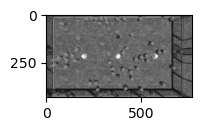

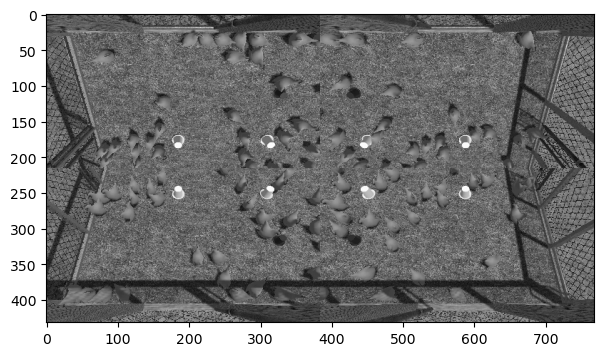

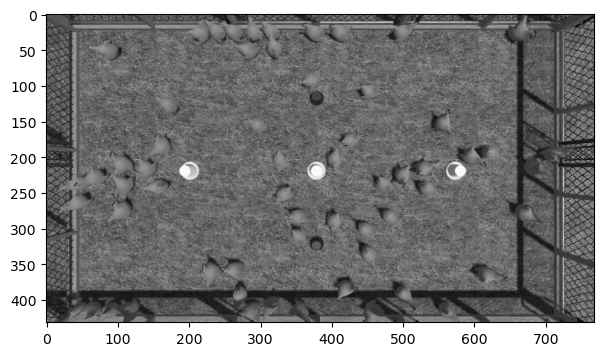

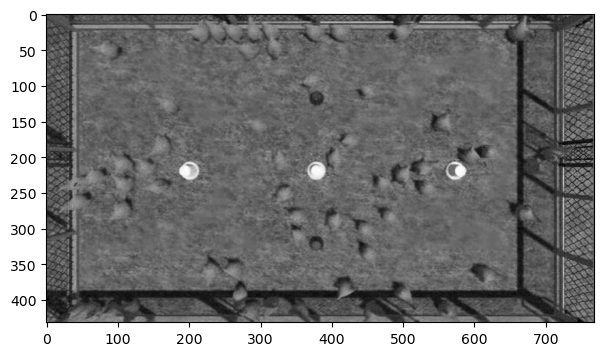

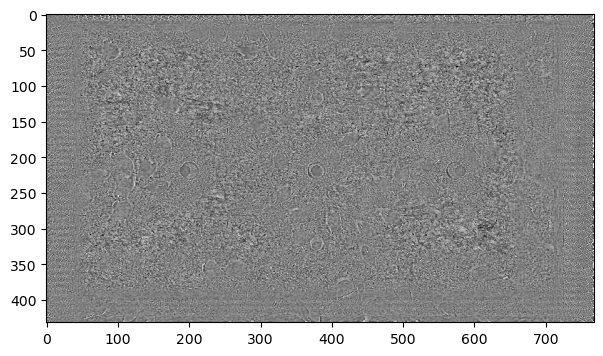

In [176]:
recon = outputs[num_epochs-1][2].detach().numpy()

for i, item in enumerate(recon):
    if i >= 3: break
    plt.subplot(2, 3, 3+i+1) # row_length + i + 1
    #item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
    # item: 1, 28, 28
    plt.imshow(item[0])
plt.show()
    
plt.figure(figsize=(16, 4))
plt.imshow(cams[0,0,:,:])
plt.show()
plt.figure(figsize=(16, 4))
plt.imshow(top[0,0,:,:])
plt.show()
plt.figure(figsize=(16, 4))
plt.imshow(item[0])
plt.show()


pred = item[0]
targ = top[0,0,:,:]
targ = targ.numpy()

plt.figure(figsize=(16, 4))
plt.imshow(pred - targ, vmin = -0.2, vmax = 0.2)
#plt.colorbar()
plt.show()

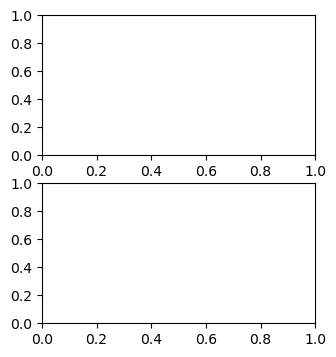

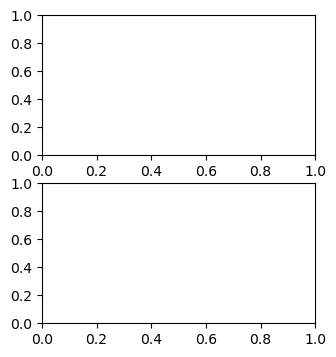

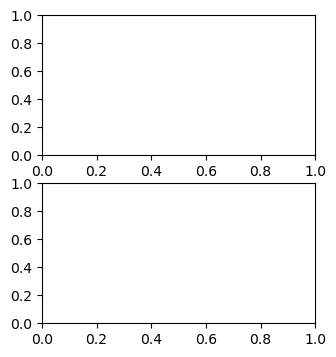

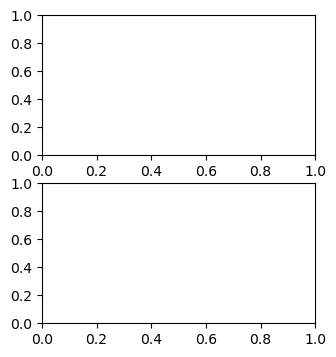

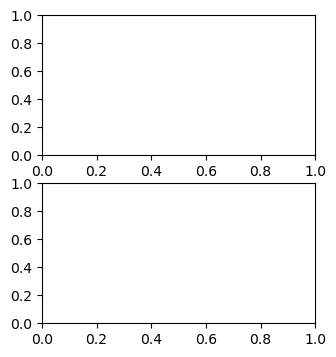

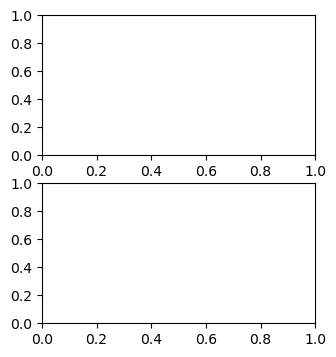

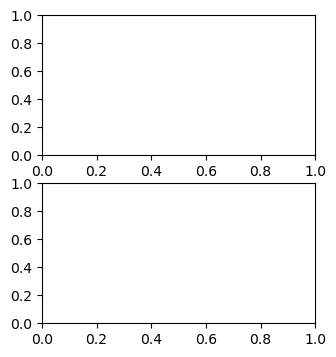

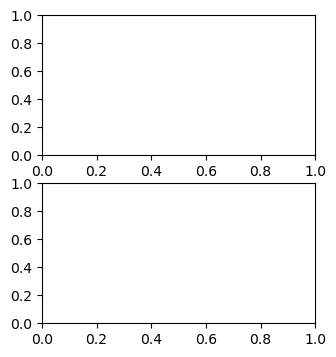

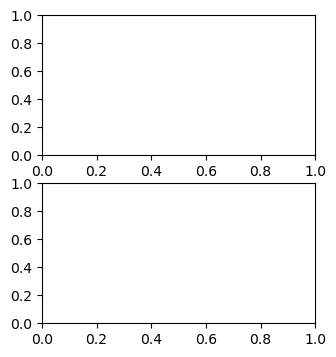

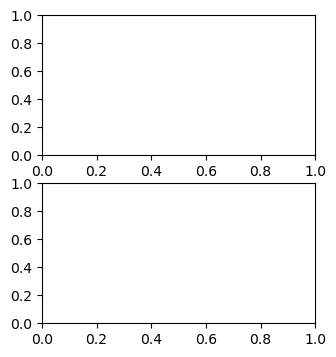

In [74]:
for k in range(0, num_epochs, 500):
    plt.figure(figsize=(12, 4))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 3: break
        plt.subplot(2, 3, i+1)
        #item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i >= 3: break
        plt.subplot(2, 3, 3+i+1) # row_length + i + 1
        #item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])

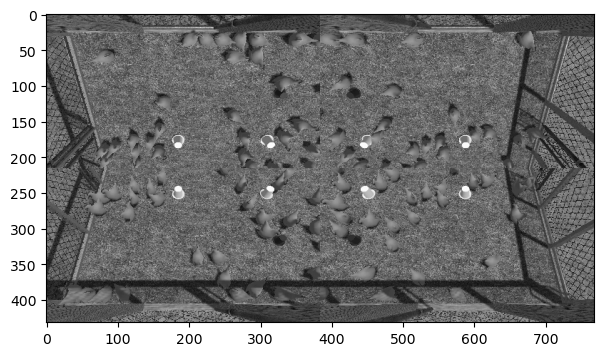

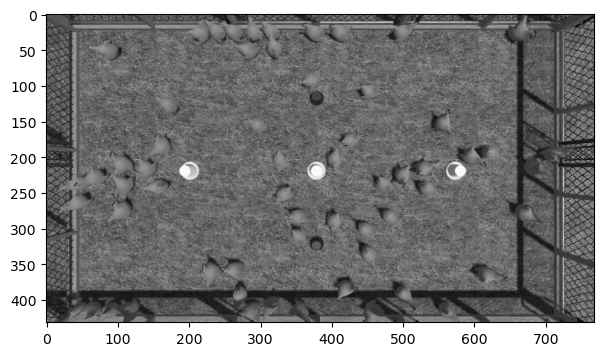

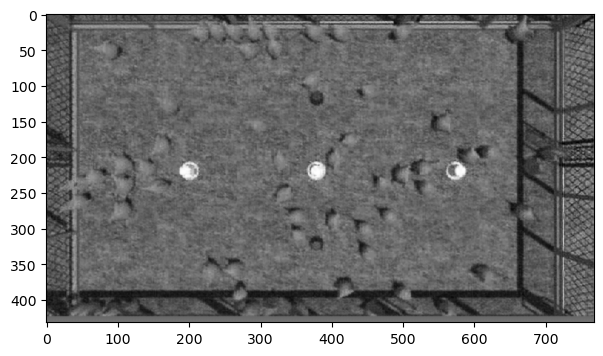

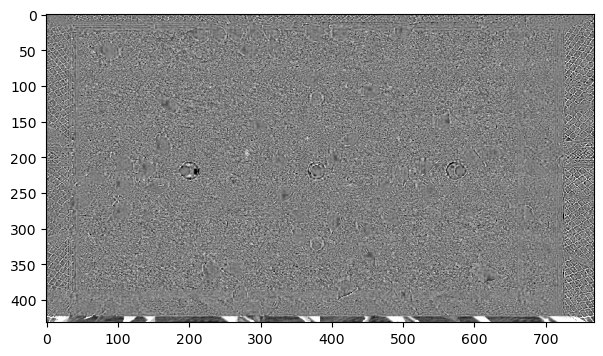

In [75]:
plt.figure(figsize=(16, 4))
plt.imshow(cams[0,0,:,:])
plt.show()
plt.figure(figsize=(16, 4))
plt.imshow(top[0,0,:,:])
plt.show()
plt.figure(figsize=(16, 4))
plt.imshow(item[0])
plt.show()


pred = item[0]
targ = top[0,0,:,:]
targ = targ.numpy()

plt.figure(figsize=(16, 4))
plt.imshow(pred - targ, vmin = -0.2, vmax = 0.2)
#plt.colorbar()
plt.show()


In [12]:
for k in range(0, num_epochs, 25):
    plt.figure(figsize=(12, 4))
    plt.gray()
    imgs = outputs_t[k][1].detach().numpy()
    recon = outputs_t[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 3: break
        plt.subplot(2, 3, i+1)
        #item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i >= 3: break
        plt.subplot(2, 3, 3+i+1) # row_length + i + 1
        #item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])

NameError: name 'outputs_t' is not defined

<Figure size 1200x400 with 0 Axes>